In [1]:
!pip freeze

joblib==1.4.2
numpy==2.1.2
scikit-learn==1.5.2
scipy==1.14.1
threadpoolctl==3.5.0


In [24]:
# imports
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models

In [25]:
# read in data and preprocess
images_path = './data/archive/asl_alphabet_train/asl_alphabet_train/'
images = []

for directory in os.listdir(images_path):
    for file in os.listdir(images_path+directory):
        file_path = images_path+directory+'/'+file
        image = Image.open(file_path)
        image = image.convert('L') # convert to grayscale
        image = image.resize((128, 128)) # resize
        # image.save('./data/resized/'+file) # uncomment to save the resized image
        image = np.array(image) # convert to array
        image = image / 255.0 # normalize
        images.append((directory, image))

x = [image[1] for image in images]
y = [image[0] for image in images]



In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_test)


# binarize the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)
joblib.dump(label_binarizer, './binarizer/label_binarizer.pkl') # save label binarizer

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(69600, 128, 128)
(69600, 29)
(17400, 128, 128)
(17400, 29)


In [9]:
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

C:\Users\calif\Desktop\DataMining\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 352s 800ms/step - accuracy: 0.2375 - loss: 2.6291 - val_accuracy: 0.8449 - val_loss: 0.6088
Epoch 2/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 326s 750ms/step - accuracy: 0.7071 - loss: 0.8756 - val_accuracy: 0.9415 - val_loss: 0.2598
Epoch 3/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 320s 735ms/step - accuracy: 0.8189 - loss: 0.5241 - val_accuracy: 0.9644 - val_loss: 0.1468
Epoch 4/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 321s 738ms/step - accuracy: 0.8653 - loss: 0.3820 - val_accuracy: 0.9790 - val_loss: 0.0924
Epoch 5/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 319s 734ms/step - accuracy: 0.8933 - loss: 0.2996 - val_accuracy: 0.9823 - val_loss: 0.0747
Epoch 6/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 31571s 73s/step - accuracy: 0.9129 - loss: 0.2491 - val_accuracy: 0.9869 - val_loss: 0.0495
Epoch 7/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 323s 741ms/step - accuracy: 0.9234 - loss: 0.2142 - val_accuracy: 0.9920 - val_loss: 0.0353
Epoch 8/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 306s 704ms/step - accuracy: 0.9326 -

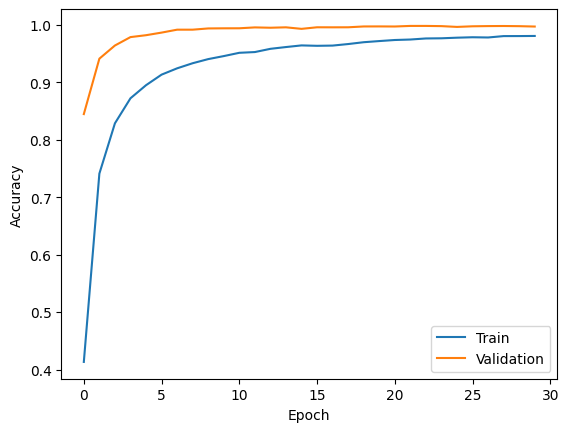

In [10]:
# plot model performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [11]:
# print results of test data ran through model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss)
print(test_accuracy)

544/544 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9977 - loss: 0.0073
0.009097330272197723
0.9973562955856323


In [14]:
classes = { 0: "A",
            1: "B",
            2: "C",
            3: "D",
            4: "del",
            5: "E",
            6: "F",
            7: "G",
            8: "H",
            9: "I",
            10: "J",
            11: "K",
            12: "L",
            13: "M",
            14: "N",
            15: "nothing",
            16: "O",
            17: "P",
            18: "Q",
            19: "R",
            20: "S",
            21: "space",
            22: "T",
            23: "U",
            24: "V",
            25: "W",
            26: "X",
            27: "Y",
            28: "Z",
            }

544/544 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step


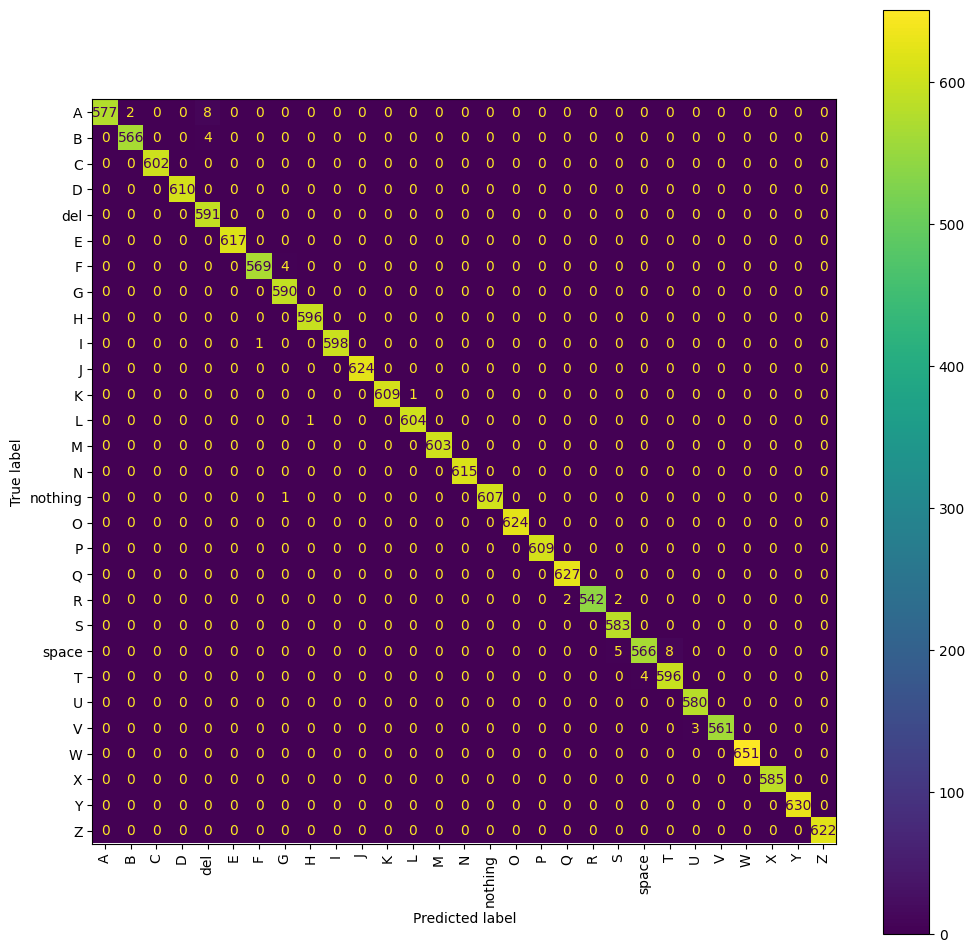

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.values())
disp.plot( values_format='d', ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

In [16]:
 print(classification_report(y_true, y_pred_classes, target_names= classes.values())) 

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       587
           B       1.00      0.99      0.99       570
           C       1.00      1.00      1.00       602
           D       1.00      1.00      1.00       610
         del       0.98      1.00      0.99       591
           E       1.00      1.00      1.00       617
           F       1.00      0.99      1.00       573
           G       0.99      1.00      1.00       590
           H       1.00      1.00      1.00       596
           I       1.00      1.00      1.00       599
           J       1.00      1.00      1.00       624
           K       1.00      1.00      1.00       610
           L       1.00      1.00      1.00       605
           M       1.00      1.00      1.00       603
           N       1.00      1.00      1.00       615
     nothing       1.00      1.00      1.00       608
           O       1.00      1.00      1.00       624
           P       1.00    

In [ ]:
# save model with date and time
from datetime import datetime
save_name = './keras_saves/' + datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '.keras'
model.save(save_name)

In [86]:
# load trained model
from tensorflow.keras.models import load_model


model = load_model('./keras_saves/2024-11-12_19-39-34.keras', compile=False) 
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,293,741 (12.56 MB)

 Trainable params: 3,293,741 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

None


In [87]:
# export model
model.export('./model_exports/')

INFO:tensorflow:Assets written to: ./model_exports/assets


INFO:tensorflow:Assets written to: ./model_exports/assets


Saved artifact at './model_exports/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2489426544976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489426546320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489426546128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489426546704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489424754832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489424755408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489016316560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489016311952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489016309648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2489016310416: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [88]:
# load exported model
import tensorflow as tf
reloaded_artifact = tf.saved_model.load('./model_exports/')
print(reloaded_artifact.signatures)


_SignatureMap({'serve': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x23E7D296F00>, 'serving_default': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x23E7D297EF0>})


In [89]:
# prepocess test image
# test_img_path = './data/archive/asl_alphabet_test/asl_alphabet_test/L_test.jpg'
test_img_path = './data/test/test4.jpeg'
og_image = Image.open(test_img_path)
image = og_image.convert('L') # convert to grayscale
image = image.resize((128, 128)) # resize
image = np.array(image) # convert to array
image = image / 255.0 # normalize
image_array = np.expand_dims(image, axis=-1) 
image_array = np.expand_dims(image_array, axis=0) 





In [90]:
# predict test image
predictions = reloaded_artifact.serve(image_array)
rounded = np.round(predictions)
label_binarizer = joblib.load('./binarizer/label_binarizer.pkl') 
original_label = label_binarizer.inverse_transform(rounded)
print(original_label)

['O']
